
<h1 id="Project:-Time-Series---Forecasting-Stock-Prices"><strong>Project: Time Series - Forecasting Stock Prices</strong><a class="anchor-link" href="#Project:-Time-Series---Forecasting-Stock-Prices">¶</a></h1><h1 id="Marks:-30">Marks: 30<a class="anchor-link" href="#Marks:-30">¶</a></h1><p>Welcome to the project on Time Series. We will use the Amazon Stock Prices dataset for this project.</p>
<hr/>
<h2 id="Context:"><strong>Context:</strong><a class="anchor-link" href="#Context:">¶</a></h2><hr/>
<p><strong>Stocks are one of the most popular financial instruments invented for building wealth</strong> and are the <strong>centerpiece of any investment portfolio.</strong> Recent advances in trading technology have opened up stock markets in such a way that nowadays, <strong>nearly anybody can own stock.</strong></p>
<p>In the last few decades, there's been an <strong>explosive increase in the average person's interest for the stock market.</strong> This makes stock value prediction an interesting and popular problem to explore.</p>
<hr/>
<h2 id="Objective:"><strong>Objective:</strong><a class="anchor-link" href="#Objective:">¶</a></h2><hr/>
<p>Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America as well as internationally. This dataset consists of monthly average stock closing prices of Amazon over a period of 12 years from 2006 to 2017. We have to <strong>build a time series model</strong> using the AR, MA, ARMA and ARIMA models in order to <strong>forecast the stock closing price of Amazon.</strong></p>
<hr/>
<h2 id="Data-Dictionary:"><strong>Data Dictionary:</strong><a class="anchor-link" href="#Data-Dictionary:">¶</a></h2><hr/>
<ul>
<li><strong>date:</strong> Date when the price was collected</li>
<li><strong>close:</strong> Closing price of the stock</li>
</ul>



<h3 id="Importing-libraries">Importing libraries<a class="anchor-link" href="#Importing-libraries">¶</a></h3>



<p><strong>Please note that we are downgrading the version of the statsmodels library to version 0.12.1.</strong> Due to some variation, the latest version of the library might not give us the desired results. You can run the below code to downgrade the library and avoid any issues in the output. Once the code runs successfully, either restart the kernel or restart the Jupyter Notebook before importing the statsmodels library.It is enough to run the install statsmodel cell once.To be sure you are using the correct version of the library, you can use the code in the Version check cell of the model.</p>


In [1]:
!pip install statsmodels==0.12.1


  Using cached statsmodels-0.12.1.tar.gz (17.4 MB)


  Installing build dependencies ... -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 /

 -

 error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [91 lines of output]
      Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7"' don't match your environment
        Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
        Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
        Using cached cython-3.1.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.7 kB)
        Using cached numpy-1.17.5.zip (6.4 MB)
        Preparing metadata (setup.py): started
        Preparing metadata (setup.py): finished with status 'done'
        Using cached scipy-1.15.3-cp310-cp310-macosx_14_0_arm64.whl.metadata (61 kB)
      INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
        Using cached scipy-1.15.2-cp31

In [2]:
# Version check 
import statsmodels
statsmodels.__version__


'0.14.5'

In [3]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
import seaborn as sns

#Importing library for date manipulation
from datetime import datetime

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

#Importing acf and pacf functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Importing models from statsmodels library
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')



<h3 id="Reading-the-dataset">Reading the dataset<a class="anchor-link" href="#Reading-the-dataset">¶</a></h3>


In [4]:
#If you are having an issue while loading the excel file in pandas, please run the below command in anaconda prompt, otherwise ignore.
#conda install -c anaconda xlrd


In [5]:
df = pd.read_excel('amazon_stocks_prices.xlsx')
df.head()


,date,close
0,2006-01-01,45.22
1,2006-02-01,38.82
2,2006-03-01,36.38
3,2006-04-01,36.32
4,2006-05-01,34.13



<h3 id="Checking-info">Checking info<a class="anchor-link" href="#Checking-info">¶</a></h3>



<h3 id="Question-1:-Check-the-info-of-the-dataset-and-write-your-observations.-(2-Marks)"><strong>Question 1: Check the info of the dataset and write your observations. (2 Marks)</strong><a class="anchor-link" href="#Question-1:-Check-the-info-of-the-dataset-and-write-your-observations.-(2-Marks)">¶</a></h3>


In [6]:
#Write your code here
df.info


<bound method DataFrame.info of           date    close
0   2006-01-01    45.22
1   2006-02-01    38.82
2   2006-03-01    36.38
3   2006-04-01    36.32
4   2006-05-01    34.13
..         ...      ...
139 2017-08-01   971.44
140 2017-09-01   968.99
141 2017-10-01  1000.72
142 2017-11-01  1139.81
143 2017-12-01  1168.84

[144 rows x 2 columns]>


<p><strong>Observations:The data is 144 rows by 2 columns. As the rows increase in time, the closing price tends to increase over time.</strong></p>


In [7]:
# Setting date as the index
df = df.set_index(['date'])
df.head()


,close
date,
2006-01-01,45.22
2006-02-01,38.82
2006-03-01,36.38
2006-04-01,36.32
2006-05-01,34.13



<p>Now, let's <strong>visualize the time series</strong> to get an idea about the trend and/or seasonality within the data.</p>


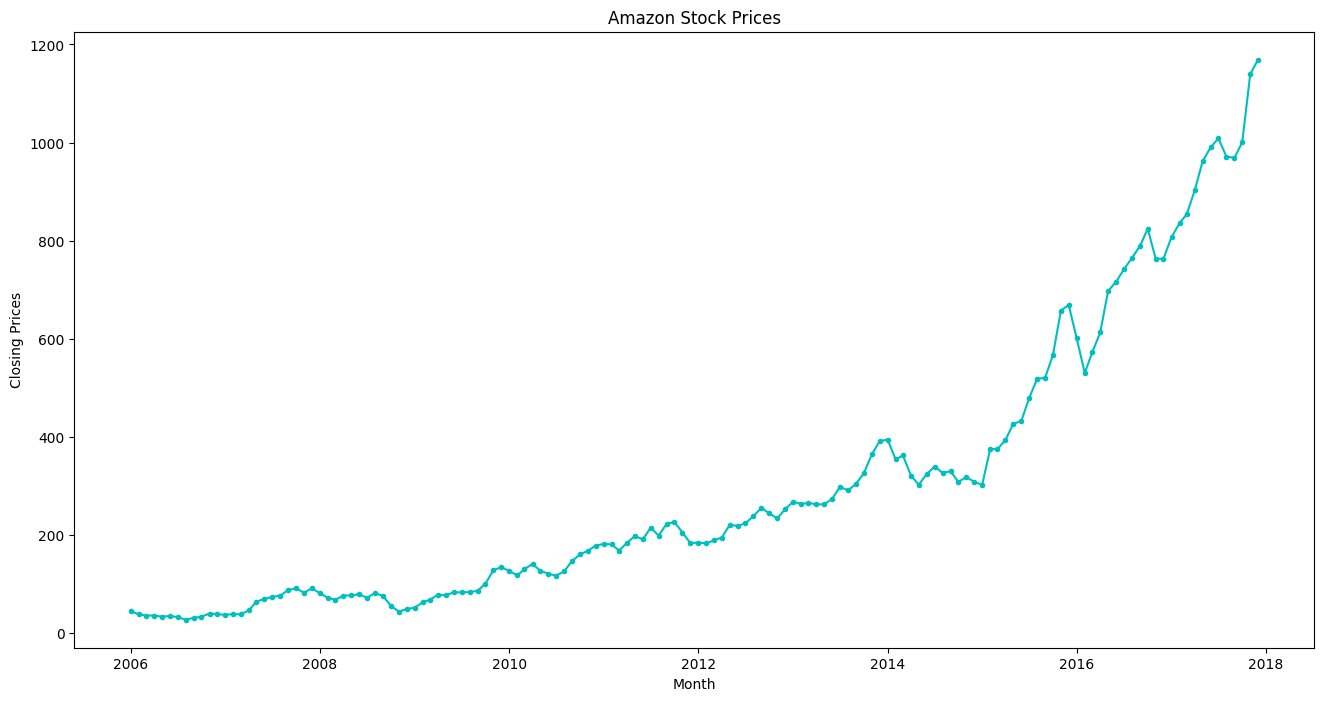

In [8]:
# Visualizing the time series
plt.figure(figsize=(16,8))
plt.xlabel("Month")
plt.ylabel("Closing Prices")
plt.title('Amazon Stock Prices')
plt.plot(df.index, df.close, color = 'c', marker='.')



<p><strong>Observations:</strong></p>
<ul>
<li>We can see that the series has an <strong>upward trend with some seasonality.</strong> This implies that the <strong>average stock price of Amazon has been increasing almost every year.</strong></li>
<li>Before building different models, it is important to <strong>check whether the series is stationary or not.</strong></li>
</ul>
<p>Let us first split the dataset into train and test data</p>



<h3 id="Splitting-the-dataset">Splitting the dataset<a class="anchor-link" href="#Splitting-the-dataset">¶</a></h3>


In [9]:
# Splitting the data into train and test
df_train = df.loc['2006-01-01':'2015-12-01']
df_test = df.loc['2016-01-01' : '2017-12-01']
print(df_train)
print(df_test)


             close
date              
2006-01-01   45.22
2006-02-01   38.82
2006-03-01   36.38
2006-04-01   36.32
2006-05-01   34.13
...            ...
2015-08-01  518.46
2015-09-01  520.96
2015-10-01  566.74
2015-11-01  657.70
2015-12-01  669.26

[120 rows x 1 columns]
              close
date               
2016-01-01   601.06
2016-02-01   530.62
2016-03-01   572.37
2016-04-01   613.59
2016-05-01   697.47
2016-06-01   716.39
2016-07-01   741.47
2016-08-01   764.84
2016-09-01   788.97
2016-10-01   824.44
2016-11-01   763.34
2016-12-01   763.33
2017-01-01   807.51
2017-02-01   835.75
2017-03-01   854.24
2017-04-01   903.39
2017-05-01   961.72
2017-06-01   990.44
2017-07-01  1008.48
2017-08-01   971.44
2017-09-01   968.99
2017-10-01  1000.72
2017-11-01  1139.81
2017-12-01  1168.84



<p>Now let us check the <strong>rolling mean and standard deviation</strong> of the series to <strong>visualize if the series has any trend or seasonality.</strong></p>



<h3 id="Testing-the-stationarity-of-the-series">Testing the stationarity of the series<a class="anchor-link" href="#Testing-the-stationarity-of-the-series">¶</a></h3>


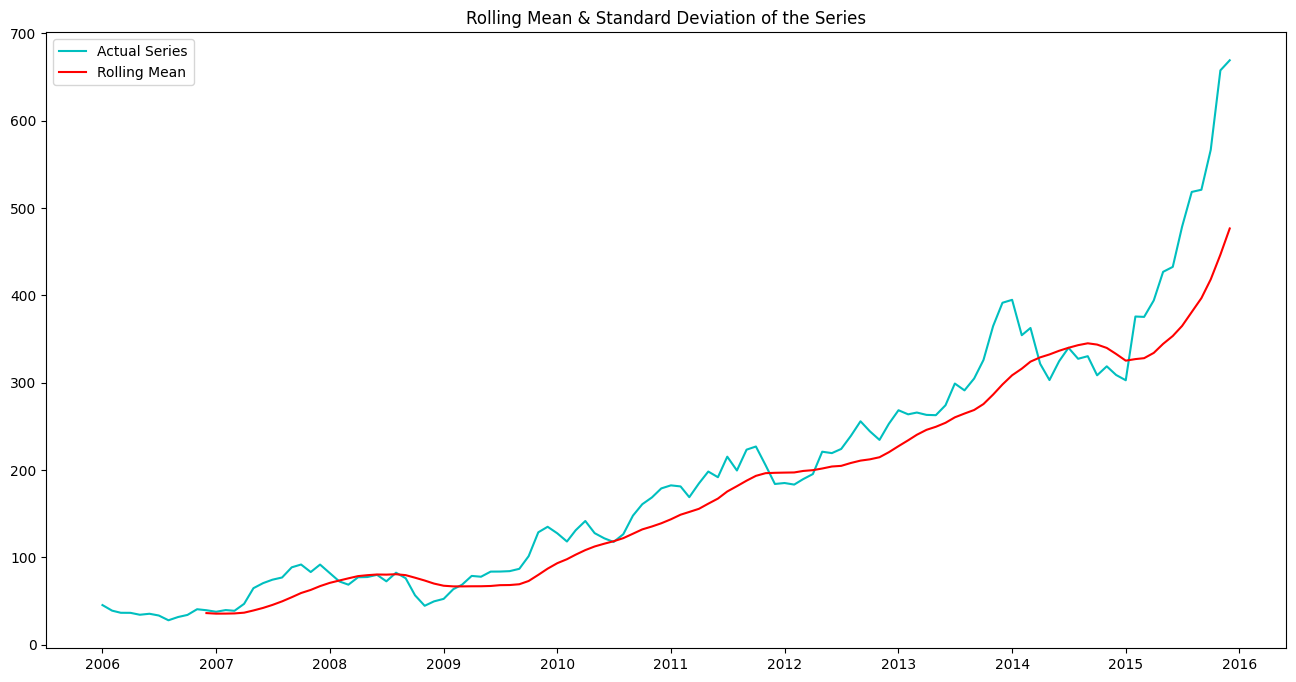

In [10]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=df_train.rolling(window=12).mean()
rolstd=df_train.rolling(window=12).std()

#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(df_train, color='c', label='Actual Series')
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean') 
#rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>We can see there is an upward trend in the series.</li>
<li>We can confirm that <strong>the series is not stationary.</strong></li>
</ul>



<p>We can also use the <strong>Augmented Dickey-Fuller (ADF) Test</strong> to verify if the series is stationary or not.
The null and alternate hypotheses for the ADF Test are defined as:</p>
<ul>
<li><strong>Null hypothesis:</strong> The Time Series is non-stationary</li>
<li><strong>Alternative hypothesis:</strong> The Time Series is stationary</li>
</ul>


In [11]:
#Define a function to use adfuller test
def adfuller(df_train):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df_train['close'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df_train)


Dickey-Fuller Test: 
Test Statistic            3.464016
p-value                   1.000000
Lags Used                 0.000000
No. of Observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64



<p><strong>Observations:</strong></p>
<ol>
<li>From the above test, we can see that the <strong>p-value = 1 i.e. &gt; 0.05</strong> (For 95% confidence intervals) therefore, <strong>we fail to reject the null hypothesis.</strong></li>
<li>Hence, <strong>we can confirm that the series is non-stationary.</strong></li>
</ol>



<h3 id="Making-the-series-stationary">Making the series stationary<a class="anchor-link" href="#Making-the-series-stationary">¶</a></h3>



<p>We can use some of the following methods to convert a non-stationary series into a stationary one:</p>
<ol>
<li><strong>Log Transformation</strong></li>
<li><strong>By differencing the series (lagged series)</strong></li>
</ol>
<p>Let's first use a log transformation over this series to remove exponential variance and check the stationarity of the series again.</p>


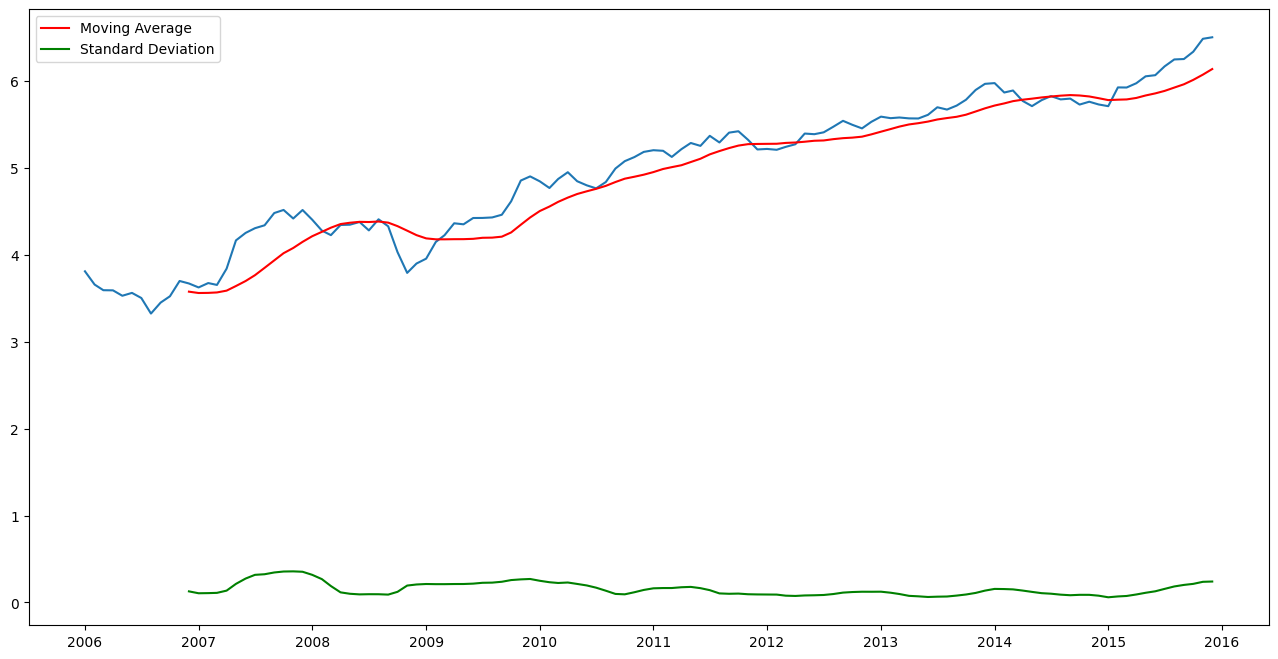

In [12]:
# Visualize the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df_train)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()
plt.plot(df_log)
plt.plot(MAvg, color='r', label = 'Moving Average')
plt.plot(MStd, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>Since <strong>we can still see the upward trend in the series</strong>, we can conclude that <strong>the series is still non-stationary.</strong> </li>
<li>However, the standard deviation is almost constant which implies that <strong>now the series has constant variance.</strong></li>
</ul>



<p><strong>Let's shift the series by order 1 (or by 1 month) &amp; apply differencing (using lagged series)</strong> and then check the rolling mean and standard deviation.</p>



<h3 id="Question-2:-Visualize-the-rolling-mean-and-rolling-standard-deviation-of-the-shifted-series-(df_shift)-and-check-the-stationarity-by-calling-the-adfuller()-function.-Also,-write-your-observations-on-the-same.-(3-Marks)"><strong>Question 2: Visualize the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. Also, write your observations on the same. (3 Marks)</strong><a class="anchor-link" href="#Question-2:-Visualize-the-rolling-mean-and-rolling-standard-deviation-of-the-shifted-series-(df_shift)-and-check-the-stationarity-by-calling-the-adfuller()-function.-Also,-write-your-observations-on-the-same.-(3-Marks)">¶</a></h3>


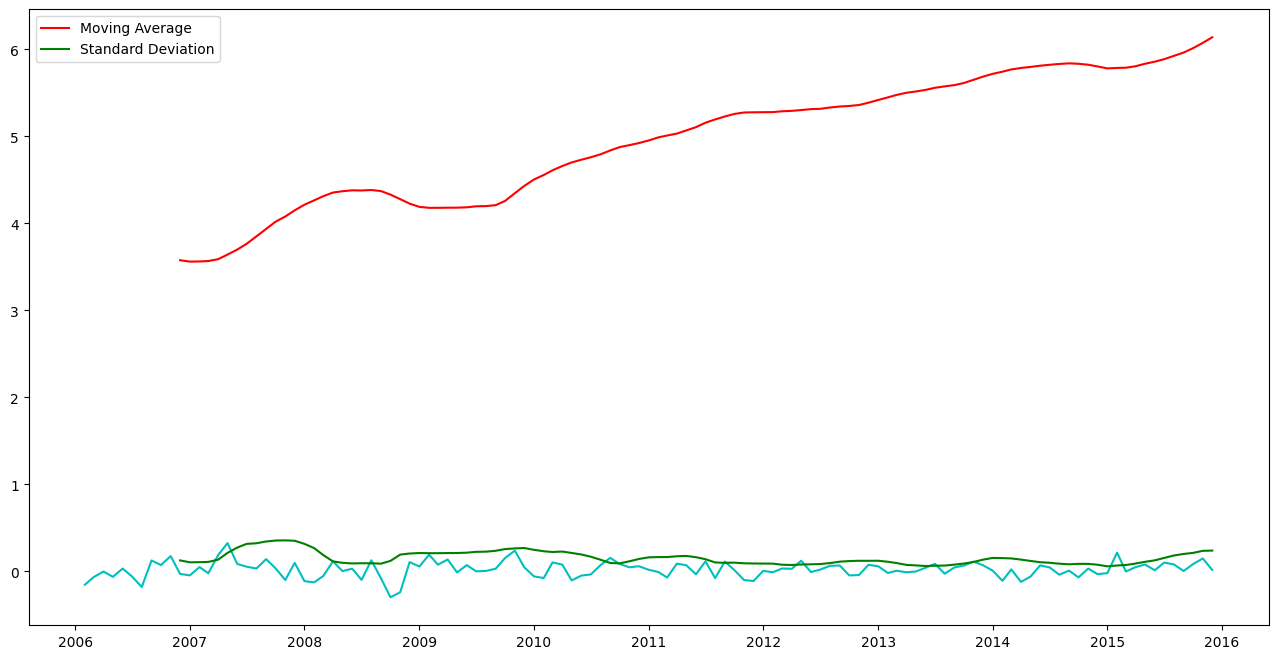

In [13]:
plt.figure(figsize=(16,8))
df_shift = df_log - df_log.shift(periods = 1)
MAvg = df_log.rolling(window=12).mean()
MStd = df_log.rolling(window=12).std()
plt.plot(df_shift, color='c')
plt.plot(MAvg, color='red', label = 'Moving Average')
plt.plot(MStd, color='green', label = 'Standard Deviation')
plt.legend()
plt.show()

#Dropping the null values that we get after applying differencing method
df_shift = df_shift.dropna()



<p><strong>Observations:The mean and standard deviation tend to stay constant overtime, while the moving average has a positve slope.</strong></p>
<p>Let us use the adfuller test to check the stationarity.</p>


In [14]:
adfuller(df_shift) # call the adfuller function for df_shift series


Dickey-Fuller Test: 
Test Statistic         -8.640344e+00
p-value                 5.447548e-14
Lags Used               0.000000e+00
No. of Observations     1.180000e+02
Critical Value (1%)    -3.487022e+00
Critical Value (5%)    -2.886363e+00
Critical Value (10%)   -2.580009e+00
dtype: float64



<p><strong>Observations:</strong></p>
<ul>
<li><strong>The P-value is now signigicantly less than 0.05. Therfore we can reject the null hypothesis and conclude this time series is now stationary.</strong></li>
</ul>
<p>Let's decompose the time series to check its different components.</p>



<h3 id="Decomposing-the-time-series-components-into-Trend,-Seasonality-and-Residual">Decomposing the time series components into Trend, Seasonality and Residual<a class="anchor-link" href="#Decomposing-the-time-series-components-into-Trend,-Seasonality-and-Residual">¶</a></h3>


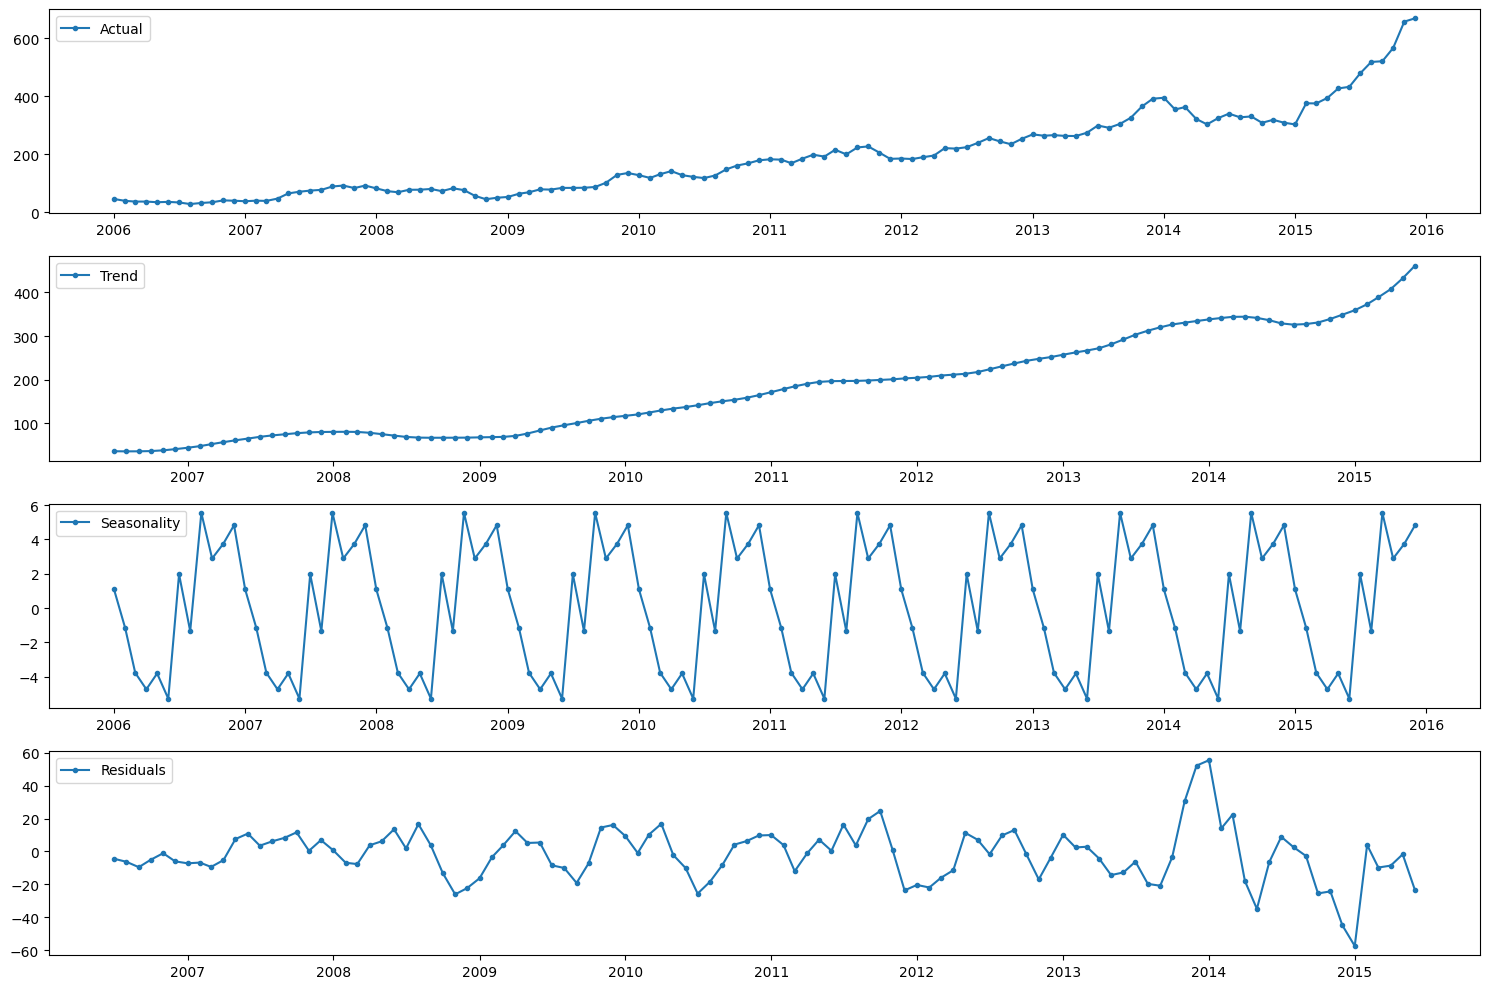

In [15]:
#Importing the seasonal_decompose function to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_train)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(df_train, label='Actual', marker='.')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()



<p><strong>Observations:</strong></p>
<ul>
<li>We can see that there are significant <strong>trend, seasonality and residuals components</strong> in the series</li>
<li>The plot for seasonality shows that <strong>Amazon's stock prices spike in July, September, and December.</strong></li>
</ul>
<p><strong>Now let's move on to the model building section. First, we will plot the <code>ACF</code> and <code>PACF</code> plots to get the values of p and q i.e. order of AR and MA models to be used.</strong></p>



<h3 id="Plotting-the-auto-correlation-function-and-partial-auto-correlation-function-to-get-p-and-q-values-for-AR,-MA,-ARMA,-and-ARIMA-models">Plotting the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models<a class="anchor-link" href="#Plotting-the-auto-correlation-function-and-partial-auto-correlation-function-to-get-p-and-q-values-for-AR,-MA,-ARMA,-and-ARIMA-models">¶</a></h3>


<Figure size 1600x800 with 0 Axes>

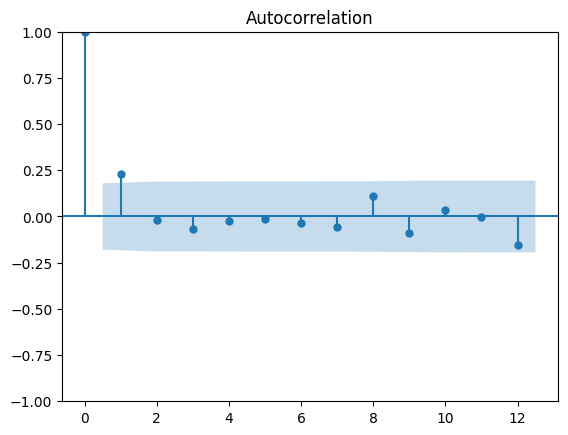

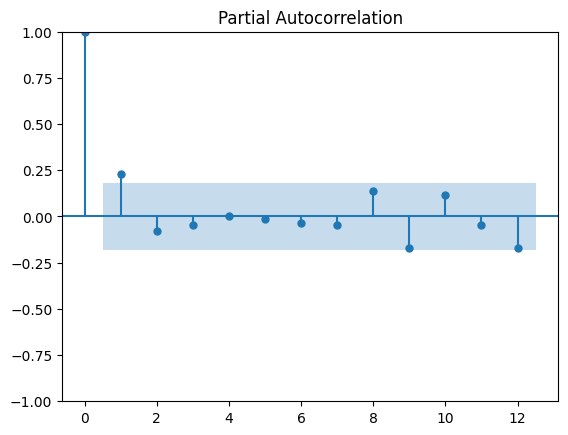

In [16]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plt.figure(figsize = (16,8))
plot_acf(df_shift, lags = 12) 
plt.show() 
plot_pacf(df_shift, lags = 12) 
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>From the above PACF plot we can see that <strong>the highest lag</strong> at which the plot extends beyond the statistically significant boundary is <strong>lag 1.</strong> </li>
<li>This indicates that an <strong>AR Model of lag 1 (p=1)</strong> should be sufficient to fit the data.</li>
<li>Similarly, from the ACF plot, we can infer that <strong>q=1.</strong></li>
</ul>



<h3 id="AR-Model">AR Model<a class="anchor-link" href="#AR-Model">¶</a></h3>



<h3 id="Question-3:-Fit-and-predict-the-shifted-series-with-the-AR-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(5-Marks)"><strong>Question 3: Fit and predict the shifted series with the AR Model and calculate the RMSE. Also, visualize the time series and write your observations. (5 Marks)</strong><a class="anchor-link" href="#Question-3:-Fit-and-predict-the-shifted-series-with-the-AR-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(5-Marks)">¶</a></h3>


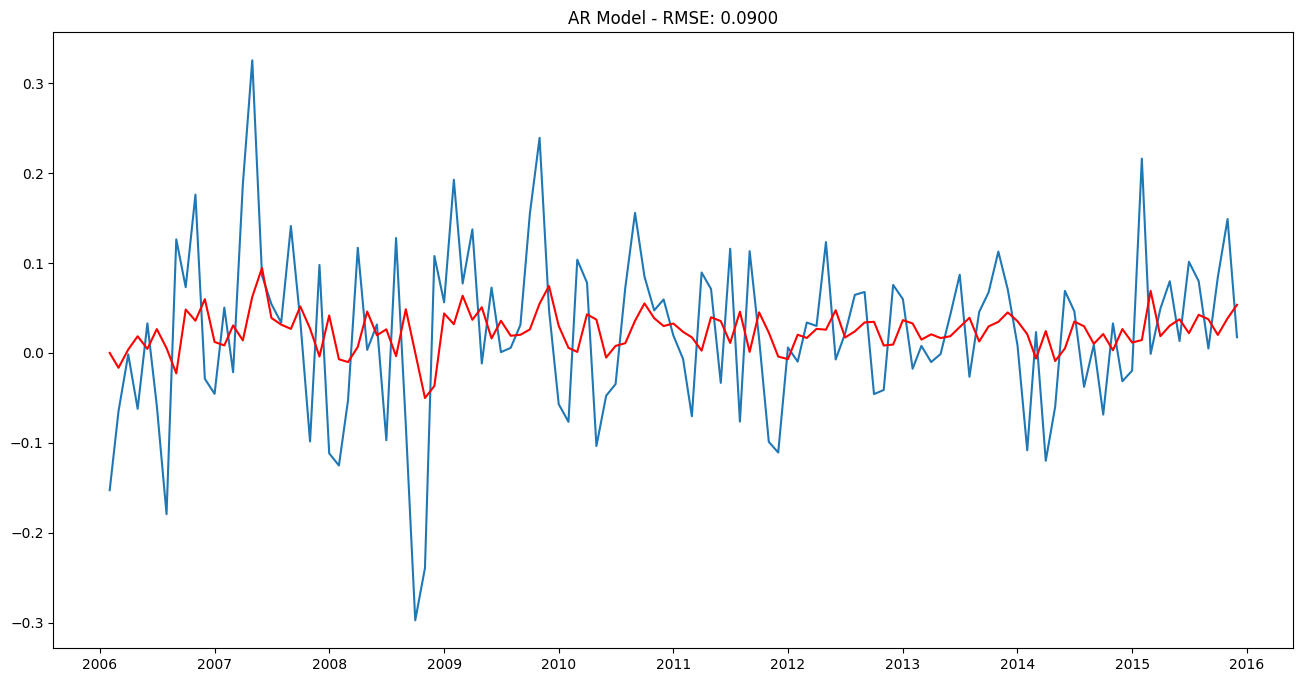

In [17]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

plt.figure(figsize=(16,8))
model_AR = AutoReg(df_shift, lags = 1) #Use number of lags as 1 and apply AutoReg function on df_shift series
results_AR = model_AR.fit() #fit the model
plt.plot(df_shift)
predict = results_AR.predict(start = 0, end = len(df_shift)-1) #predict the series 
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,df_shift['close'], squared=False))  #Calculating rmse
plt.show()



<p><strong>Observations:The Root Mean Squarred Error for this model is 0.09.</strong></p>
<p><strong>Let's check the AIC value</strong> of the model</p>


In [18]:
results_AR.aic


-229.33802078093757


<p>Now, let's build MA, ARMA, and ARIMA models as well, and see if we can get a better model</p>



<h3 id="MA-Model">MA Model<a class="anchor-link" href="#MA-Model">¶</a></h3>



<p><strong>We will be using an ARIMA model with p=0 and d=0 so that it will work as an MA model</strong></p>



<h3 id="Question-4:-Fit-and-predict-the-shifted-series-with-the-MA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)"><strong>Question 4: Fit and predict the shifted series with the MA Model and calculate the RMSE. Also, visualize the time series and write your observations. (2 Marks)</strong><a class="anchor-link" href="#Question-4:-Fit-and-predict-the-shifted-series-with-the-MA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)">¶</a></h3>


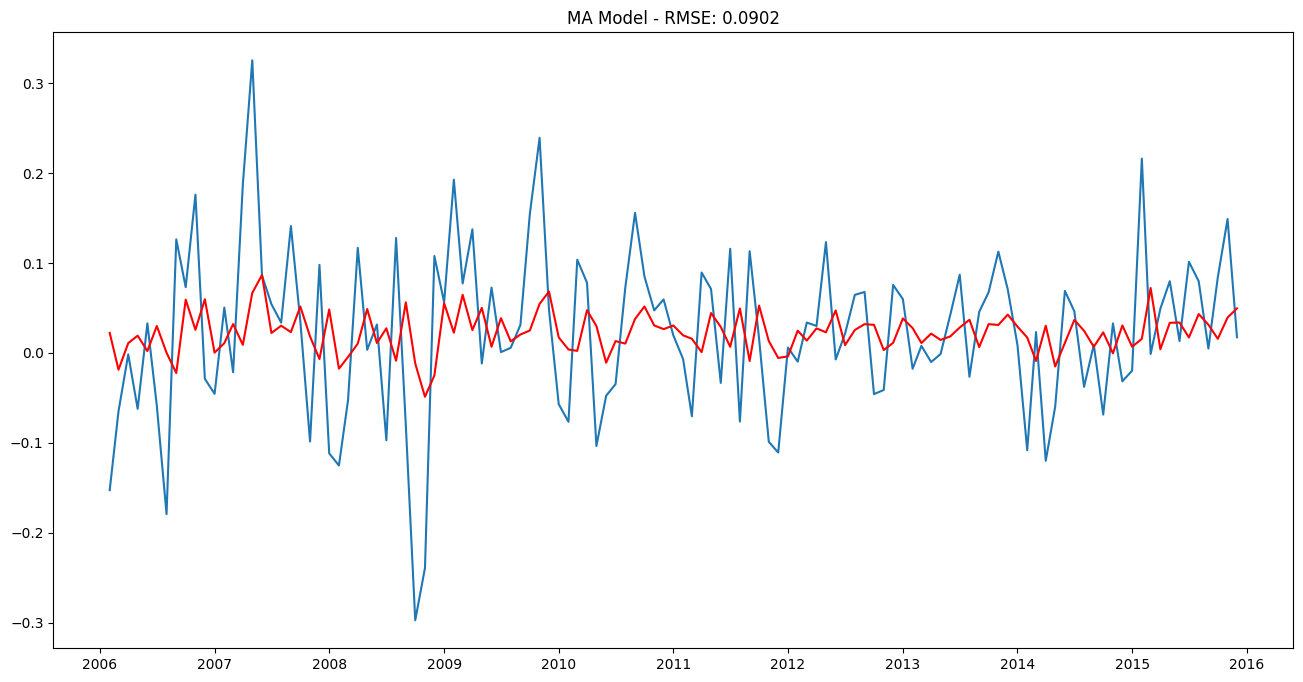

In [19]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))
model_MA = ARIMA(df_shift['close'], order=(0, 0, 1))
results_MA = model_MA.fit()
plt.plot(df_shift)
plt.plot(results_MA.fittedvalues.index, results_MA.fittedvalues, color='red')
plt.title('MA Model - RMSE: %.4f' % mean_squared_error(results_MA.fittedvalues, df_shift['close'].loc[results_MA.fittedvalues.index], squared=False))
plt.show()



<p><strong>Observations:The MA Model gives almost an identical RMSE score of 0.902, only 0.002 greater than the score of the AR model.</strong></p>
<p>Let's check the AIC value of the model</p>


In [20]:
results_MA.aic


-229.0949383547975


<ul>
<li><strong>The MA model is giving a much lower AIC</strong> when compared to the AR model, implying that <strong>the MA model fits the training data better.</strong> </li>
</ul>



<h3 id="ARMA-Model">ARMA Model<a class="anchor-link" href="#ARMA-Model">¶</a></h3>



<p>We will be using an <strong>ARIMA model with p=1 and q=1</strong> (as observed from the ACF and PACF plots) <strong>and d=0 so that it will work as an ARMA model.</strong></p>



<h3 id="Question-5:-Fit-and-predict-the-shifted-series-with-the-ARMA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)"><strong>Question 5: Fit and predict the shifted series with the ARMA Model and calculate the RMSE. Also, visualize the time series and write your observations. (2 Marks)</strong><a class="anchor-link" href="#Question-5:-Fit-and-predict-the-shifted-series-with-the-ARMA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)">¶</a></h3>


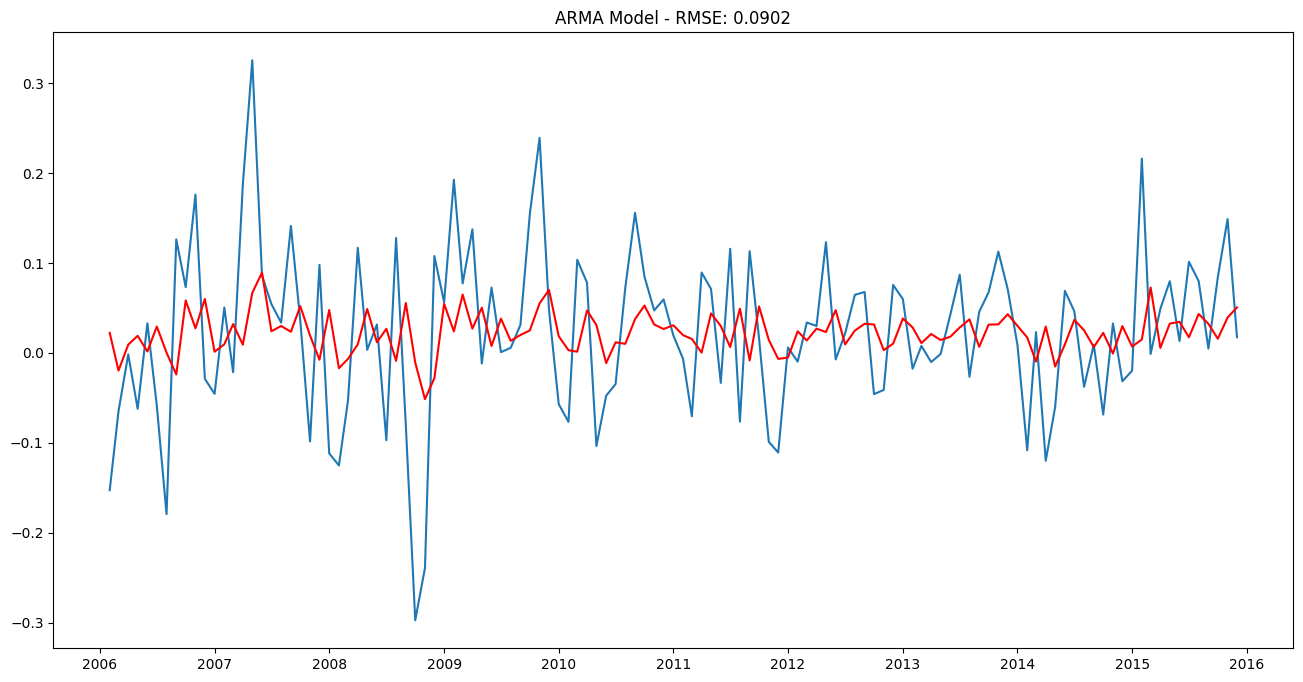

In [21]:
plt.figure(figsize=(16,8))
model_ARMA = ARIMA(df_shift['close'], order=(1, 0, 1))
results_ARMA = model_ARMA.fit()
plt.plot(df_shift)
plt.plot(results_ARMA.fittedvalues.index, results_ARMA.fittedvalues, color='red')
plt.title('ARMA Model - RMSE: %.4f' % mean_squared_error(results_ARMA.fittedvalues, df_shift['close'].loc[results_ARMA.fittedvalues.index], squared=False))
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li><strong>This ARMA model keeps the same RMSE score as the previous MA model of 0.0902.</strong></li>
</ul>
<p><strong>Let's check the AIC value</strong> of the model</p>


In [22]:
results_ARMA.aic


-227.1112913256459


<ul>
<li><strong>The AIC value of the ARMA model is more or less similar</strong> to MA model </li>
</ul>
<p><strong>Let us try using the ARIMA Model.</strong></p>



<h3 id="ARIMA-Model">ARIMA Model<a class="anchor-link" href="#ARIMA-Model">¶</a></h3>



<p>We will be using an <strong>ARIMA Model with p=1, d=1, &amp; q=1</strong>.</p>



<h3 id="Question-6:-Fit-and-predict-the-shifted-series-with-the-ARIMA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)"><strong>Question 6: Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations. (2 Marks)</strong><a class="anchor-link" href="#Question-6:-Fit-and-predict-the-shifted-series-with-the-ARIMA-Model-and-calculate-the-RMSE.-Also,-visualize-the-time-series-and-write-your-observations.-(2-Marks)">¶</a></h3>


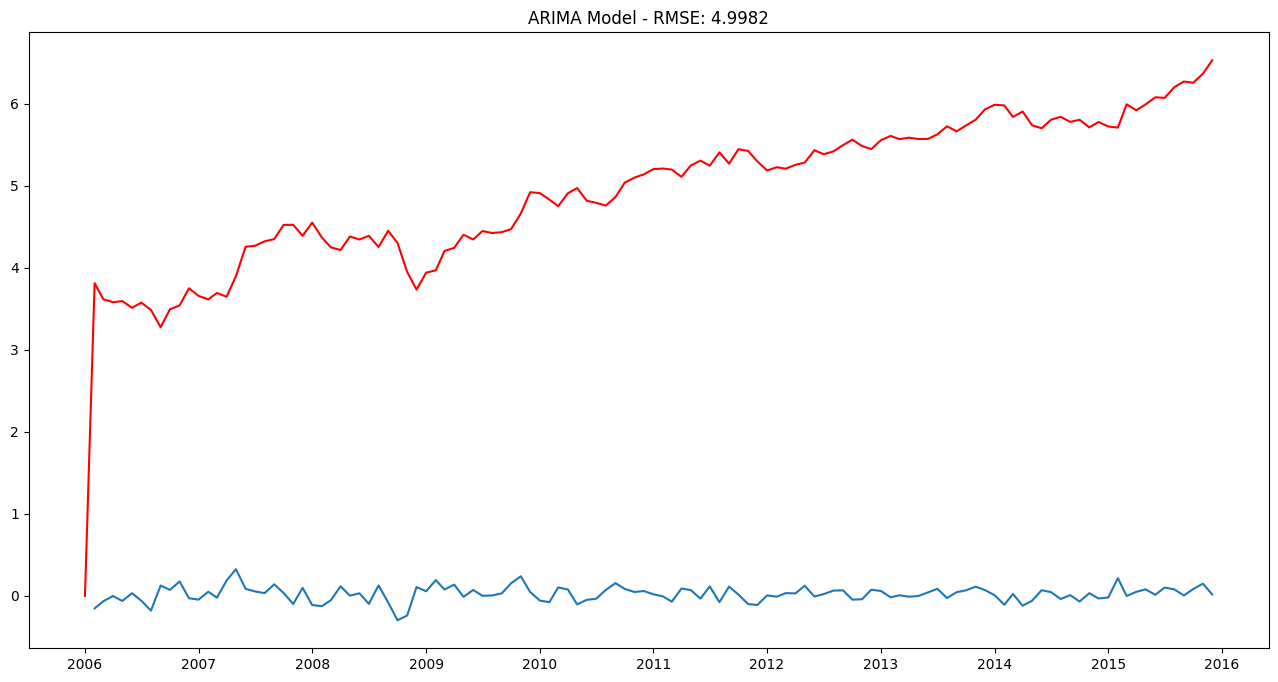

In [23]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16,8))
model_ARIMA =  ARIMA(df_log['close'], order=(1,1,1))
results_ARIMA = model_ARIMA.fit()
plt.plot(df_shift)
plt.plot(results_ARIMA.fittedvalues.index, results_ARIMA.fittedvalues, color='red')
common_idx = results_ARIMA.fittedvalues.index.intersection(df_shift.index)
rmse = mean_squared_error(results_ARIMA.fittedvalues.loc[common_idx], df_shift['close'].loc[common_idx], squared=False)
plt.title('ARIMA Model - RMSE: %.4f' % rmse)
plt.show()



<p><strong>Observations:Again the model has the same RMSE score as the MA model and ARMA model.</strong></p>
<p><strong>Let's check the AIC value</strong> of the model</p>


In [24]:
results_ARIMA.aic


-224.9341637613508


<ul>
<li><strong>The AIC value of the ARIMA model is the same</strong> as the ARMA model. </li>
</ul>
<p>We can see that <strong>all the models return almost the same RMSE.</strong> There is not much difference in AIC value as well across all the models except for the AR model.</p>
<p><strong>We can choose to predict the values using ARIMA as it takes into account more factors than AR, MA, ARMA models.</strong></p>


In [25]:
# Printing the fitted values
predictions=pd.Series(results_ARIMA.fittedvalues)
predictions


date
2006-01-01    0.000000
2006-02-01    3.811539
2006-03-01    3.615838
2006-04-01    3.580385
2006-05-01    3.593578
                ...   
2015-08-01    6.200566
2015-09-01    6.270534
2015-10-01    6.254639
2015-11-01    6.364662
2015-12-01    6.529207
Length: 120, dtype: float64


<h3 id="Inverse-Transformation">Inverse Transformation<a class="anchor-link" href="#Inverse-Transformation">¶</a></h3>



<p>Now we have fitted values using the ARIMA model, <strong>we will use the inverse transformation to get back the original values.</strong></p>



<h3 id="Question-7:-Apply-an-inverse-transformation-on-the-predictions-of-the-ARIMA-Model.-(5-Marks)"><strong>Question 7: Apply an inverse transformation on the predictions of the ARIMA Model. (5 Marks)</strong><a class="anchor-link" href="#Question-7:-Apply-an-inverse-transformation-on-the-predictions-of-the-ARIMA-Model.-(5-Marks)">¶</a></h3>


In [26]:
#First step - doing cumulative sum
predictions_cumsum = predictions.cumsum() # use .cumsum fuction on the predictions
predictions_cumsum


date
2006-01-01      0.000000
2006-02-01      3.811539
2006-03-01      7.427378
2006-04-01     11.007763
2006-05-01     14.601341
                 ...    
2015-08-01    564.111625
2015-09-01    570.382159
2015-10-01    576.636798
2015-11-01    583.001460
2015-12-01    589.530667
Length: 120, dtype: float64

In [27]:
#Second step - Adding the first value of the log series to the cumulative sum values
predictions_log = pd.Series(df_log['close'].iloc[0], index=df_log.index)
predictions_log = predictions_log.add(predictions_cumsum, fill_value=0)
predictions_log


date
2006-01-01      3.811539
2006-02-01      7.623079
2006-03-01     11.238917
2006-04-01     14.819303
2006-05-01     18.412880
                 ...    
2015-08-01    567.923164
2015-09-01    574.193699
2015-10-01    580.448338
2015-11-01    586.812999
2015-12-01    593.342207
Length: 120, dtype: float64

In [28]:
#Third step - applying exponential transformation
predictions_ARIMA = np.exp(predictions_log) #use exponential function
predictions_ARIMA


date
2006-01-01     4.522000e+01
2006-02-01     2.044848e+03
2006-03-01     7.603257e+04
2006-04-01     2.728609e+06
2006-05-01     9.922298e+07
                  ...      
2015-08-01    4.424829e+246
2015-09-01    2.339671e+249
2015-10-01    1.217615e+252
2015-11-01    7.073713e+254
2015-12-01    4.844469e+257
Length: 120, dtype: float64

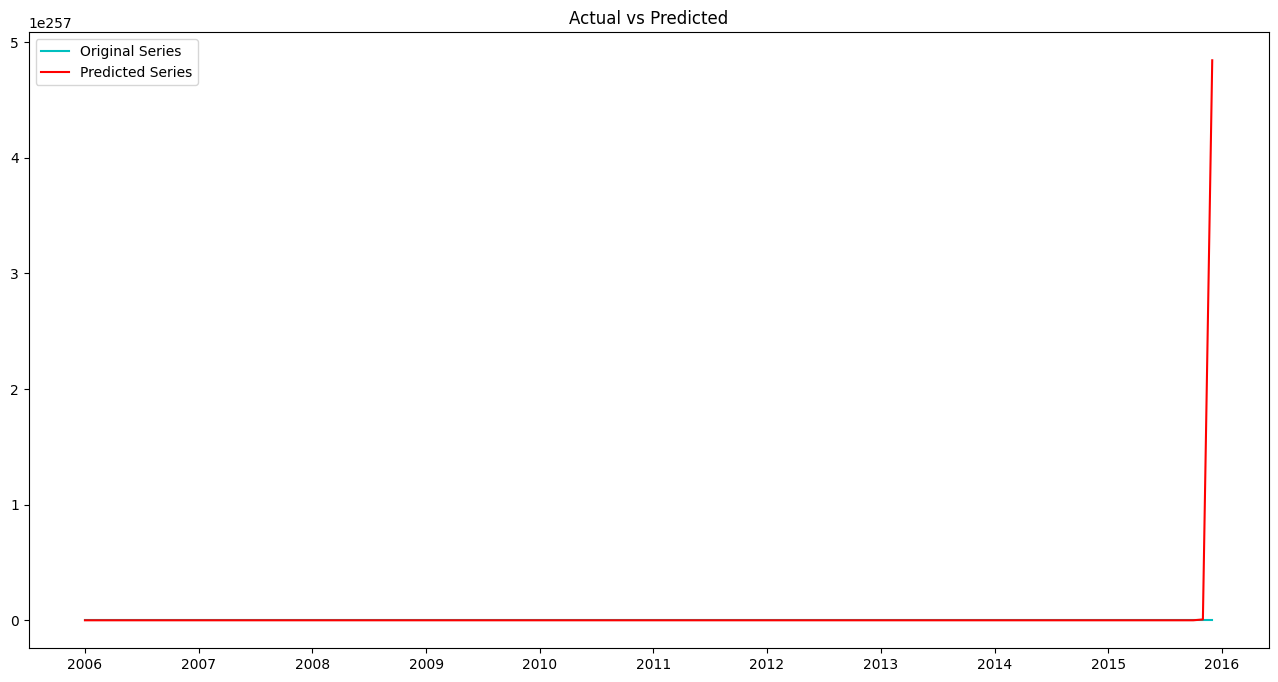

In [29]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df_train, color = 'c', label = 'Original Series')  #plot the original train series
plt.plot(predictions_ARIMA, color = 'r', label = 'Predicted Series')  #plot the predictions_ARIMA 
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>We can see that <strong>the predicted series is very similar to the original series</strong> i.e. The model is good at predicting values on the training data except for the dip in stock prices in 2015 which may have been due to some external factors that are not included in this model. </li>
<li>Let us <strong>forecast the closing prices for the next 24 months.</strong></li>
</ul>



<h3 id="Forecasting-the-values-for-next-24-months-and-compare-it-with-test-data">Forecasting the values for next 24 months and compare it with test data<a class="anchor-link" href="#Forecasting-the-values-for-next-24-months-and-compare-it-with-test-data">¶</a></h3>



<p><strong>To forecast the values for the next 24 months using the ARIMA model, we need to follow the steps below:</strong></p>
<ol>
<li>Forecast the log-transformed fitted values for the next 24 months</li>
<li>Make a list of these 24 month (2016-2017) forecasted values</li>
<li>Convert that list into a series so that we can work with pandas functions </li>
<li>Make a dataframe where we have the dates starting from 2016-01-01 to 2017-12-01 as the index and the respective forecasted values</li>
<li>Apply the inverse transformation and get the real forecasted values</li>
</ol>



<h3 id="Question-8:-Forecast-the-stocks-prices-for-the-next-24-months-and-perform-the-inverse-transformation.-(5-Marks)"><strong>Question 8: Forecast the stocks prices for the next 24 months and perform the inverse transformation. (5 Marks)</strong><a class="anchor-link" href="#Question-8:-Forecast-the-stocks-prices-for-the-next-24-months-and-perform-the-inverse-transformation.-(5-Marks)">¶</a></h3>


In [30]:
# Forecasting the values for next 24 months
forecasted_ARIMA = results_ARIMA.get_forecast(steps=24).predicted_mean
forecasted_ARIMA

2016-01-01    6.506248
2016-02-01    6.506260
2016-03-01    6.506263
2016-04-01    6.506263
2016-05-01    6.506263
2016-06-01    6.506263
2016-07-01    6.506263
2016-08-01    6.506263
2016-09-01    6.506263
2016-10-01    6.506263
2016-11-01    6.506263
2016-12-01    6.506263
2017-01-01    6.506263
2017-02-01    6.506263
2017-03-01    6.506263
2017-04-01    6.506263
2017-05-01    6.506263
2017-06-01    6.506263
2017-07-01    6.506263
2017-08-01    6.506263
2017-09-01    6.506263
2017-10-01    6.506263
2017-11-01    6.506263
2017-12-01    6.506263
Freq: MS, Name: predicted_mean, dtype: float64

In [31]:
# Creating a Series containing all the forecasted values
series1 = pd.Series(forecasted_ARIMA)
series1

2016-01-01    6.506248
2016-02-01    6.506260
2016-03-01    6.506263
2016-04-01    6.506263
2016-05-01    6.506263
2016-06-01    6.506263
2016-07-01    6.506263
2016-08-01    6.506263
2016-09-01    6.506263
2016-10-01    6.506263
2016-11-01    6.506263
2016-12-01    6.506263
2017-01-01    6.506263
2017-02-01    6.506263
2017-03-01    6.506263
2017-04-01    6.506263
2017-05-01    6.506263
2017-06-01    6.506263
2017-07-01    6.506263
2017-08-01    6.506263
2017-09-01    6.506263
2017-10-01    6.506263
2017-11-01    6.506263
2017-12-01    6.506263
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
# Making a new dataframe to get the additional dates from 2016-2017 (24 months)
index = pd.date_range('2016-01-01', periods=24, freq='MS')
df1 = pd.DataFrame({'forecasted': series1.values}, index=index)
df1

,forecasted
2016-01-01,6.506248
2016-02-01,6.506260
2016-03-01,6.506263
2016-04-01,6.506263
2016-05-01,6.506263
2016-06-01,6.506263
2016-07-01,6.506263
2016-08-01,6.506263
2016-09-01,6.506263
2016-10-01,6.506263


In [33]:
#Applying exponential transformation to the forecasted log values
forecasted_ARIMA = np.exp(df1['forecasted']) #use exponential function on forecasted data
forecasted_ARIMA


2016-01-01    669.310291
2016-02-01    669.318759
2016-03-01    669.320184
2016-04-01    669.320424
2016-05-01    669.320465
2016-06-01    669.320472
2016-07-01    669.320473
2016-08-01    669.320473
2016-09-01    669.320473
2016-10-01    669.320473
2016-11-01    669.320473
2016-12-01    669.320473
2017-01-01    669.320473
2017-02-01    669.320473
2017-03-01    669.320473
2017-04-01    669.320473
2017-05-01    669.320473
2017-06-01    669.320473
2017-07-01    669.320473
2017-08-01    669.320473
2017-09-01    669.320473
2017-10-01    669.320473
2017-11-01    669.320473
2017-12-01    669.320473
Freq: MS, Name: forecasted, dtype: float64


<p>Now, let's try to visualize the original data with the predicted values on the training data and the forecasted values.</p>


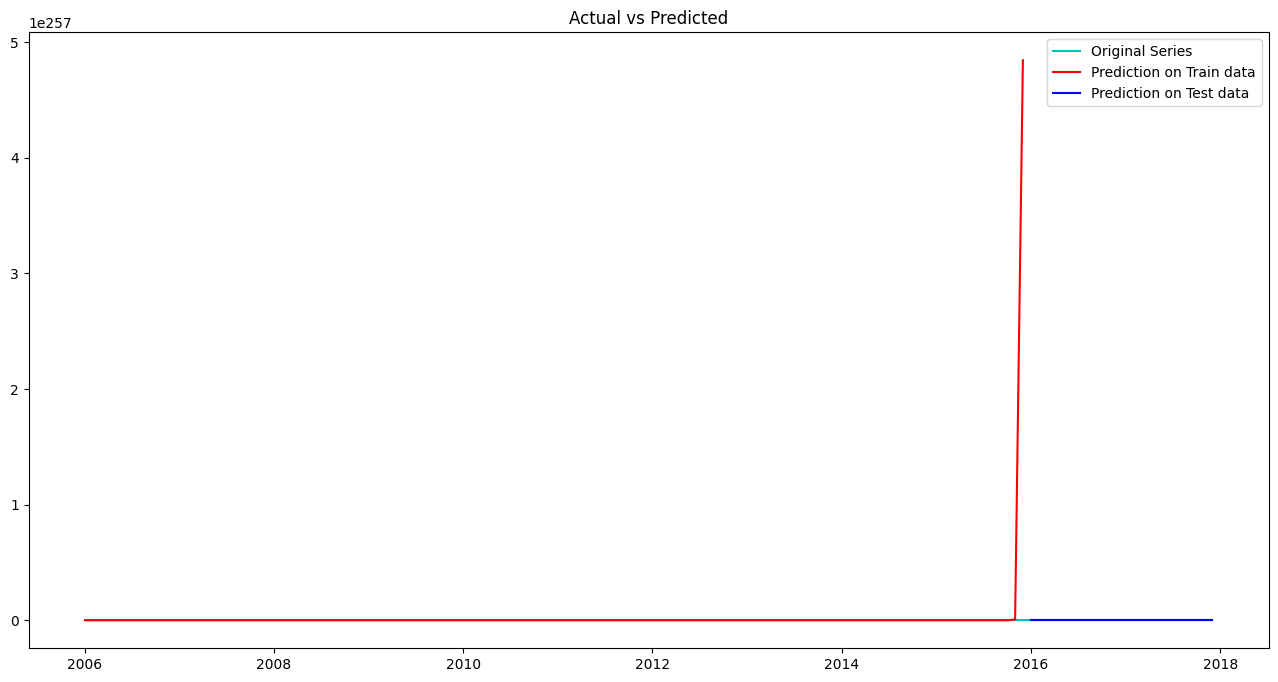

In [34]:
#Plotting the original vs predicted series
plt.figure(figsize=(16,8))
plt.plot(df, color = 'c', label = 'Original Series')
plt.plot(predictions_ARIMA, color = 'r', label = 'Prediction on Train data') #plot the predictions_ARIMA series
plt.plot(forecasted_ARIMA, label = 'Prediction on Test data', color='b')  #plot the forecasted_ARIMA series
plt.title('Actual vs Predicted')
plt.legend()
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li><strong>As observed earlier, most of the predicted values on the training data are very close to the actual values</strong> except for the dip in stock prices in the year 2015.</li>
<li><strong>On the test data, the model is able to correctly predict the trend of the stock prices</strong>, as we can see that the blue line appears to be close to the actual values (cyan blue) and they both have an upward trend. <strong>However the test predictions are not able to identify the volatile variations in the stock prices over the last 2 years.</strong></li>
</ul>
<p>Let's test the RMSE of the transformed predictions and the original value on the training and testing data to check whether the model is giving a generalized performance or not.</p>



<h3 id="Question-9:-Check-the-RMSE-on-the-original-train-and-test-data-and-write-your-conclusion-from-the-above-analysis.-(4-Marks)"><strong>Question 9: Check the RMSE on the original train and test data and write your conclusion from the above analysis. (4 Marks)</strong><a class="anchor-link" href="#Question-9:-Check-the-RMSE-on-the-original-train-and-test-data-and-write-your-conclusion-from-the-above-analysis.-(4-Marks)">¶</a></h3>


In [35]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(predictions_ARIMA, df_train, squared = False) #calculate RMSE using the predictions_ARIMA and df_train 
error


inf

In [36]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(forecasted_ARIMA, df_test, squared = False)  #calculate RMSE using the forecasted_ARIMA and df_test
error


233.71999245455612


<h3 id="Conclusion">Conclusion<a class="anchor-link" href="#Conclusion">¶</a></h3>



<p><strong>Write your conclusion here</strong>
The RMSE is lower on the training data compared to the testing data, indicating that predictions on the training data are closer to the actual values compared to the testing data. This is likely because the price is increasing at a greater rate in the twelve month period used for the testing data. As seen on the chart as time goes on, the price of the asset tends to increase exponentially. The model is also likely not complex enough to anticipate external factors that have a correlation on price.</p>
